<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 84  418k   84  354k    0     0   354k      0  0:00:01  0:00:01 --:--:--  349k
100  418k  100  418k    0     0   418k      0  0:00:01  0:00:01 --:--:--  399k


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [5]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.dropna()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [10]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = pd.DataFrame()
df2['sexo'] = df['Gender'].apply(lambda x: 'masculino' if x == 'Male' else 'femenino')
df2['altura'] = df['Height'] * 2.54 / 100
df2['peso'] = df['Weight'] * 0.453592
df2.head()

,sexo,altura,peso
0,masculino,1.875714,109.720985
1,masculino,1.747060,73.622732
2,masculino,1.882397,96.497550
3,masculino,1.821967,99.809504
4,masculino,1.774998,93.598619


In [12]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('Cantidad de datos en observacion:', df2.shape[0])

Cantidad de datos en observacion: 10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

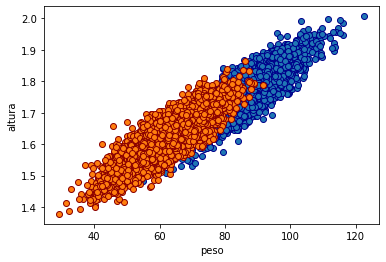

In [13]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df2[df2['sexo'] == 'masculino']['peso'], df2[df2['sexo'] == 'masculino']['altura'], edgecolors='darkBlue', label='masculino')
ax.scatter(df2[df2['sexo'] == 'femenino']['peso'], df2[df2['sexo'] == 'femenino']['altura'], edgecolors='darkRed', label='femenino')
ax.set_xlabel('peso')
ax.set_ylabel('altura')
plt.show()

Altura promedio: 1.7532691860179228


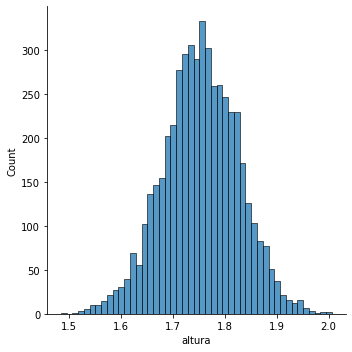

In [14]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
print('Altura promedio:', df2[df2['sexo'] == 'masculino']['altura'].mean())
sns.displot(df2[df2['sexo'] == 'masculino']['altura'])
plt.show()

Altura promedio: 1.6182028495269967


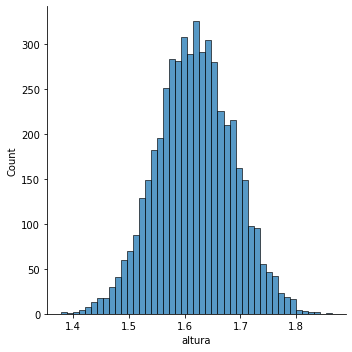

In [15]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio
print('Altura promedio:', df2[df2['sexo'] == 'femenino']['altura'].mean())
sns.displot(df2[df2['sexo'] == 'femenino']['altura'])
plt.show()

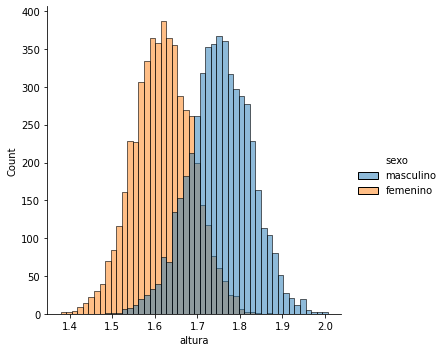

In [16]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [19]:
# Obtener las variables X y Y
df_femenino = df2[df2['sexo'] == 'femenino']
X = df_femenino[['peso']].values
y = df_femenino['altura'].values

In [20]:
from sklearn.model_selection import train_test_split
# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Creamos el modelo base
class MeanBaseModel():
    def __init__(self):
        self.W = 0

    def fit(self, X, y):
        self.W = np.mean(y / X)

    def predict(self, X):
        return X * self.W

In [22]:
# Entrenar nuestro modelo base (un promediador)
mean_model = MeanBaseModel()
mean_model.fit(X_train, y_train)
y_hat_base = mean_model.predict(X_test)
print(f"Promedio: {mean_model.W:.2f}")

Promedio: $0.03


In [42]:
# Sino hubieramos utilizado el modelo generado, las líneas de código serían:
funcion = y_train / X_train
promedio = funcion.mean()
y_hat_base = X_test * promedio
print(f"Promedio: {promedio:.2f}")

Promedio: 0.03


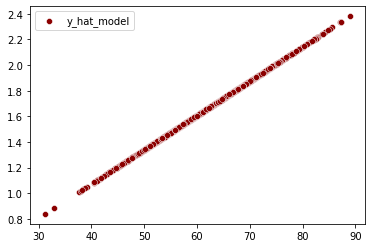

In [43]:
sns.scatterplot(x=X_test[:,0], y=y_hat_base[:,0], color='darkRed', label='y_hat_model')
#plt.scatter(X_test, y_hat_base, color='darkRed', label='y_hat_model')
plt.show()

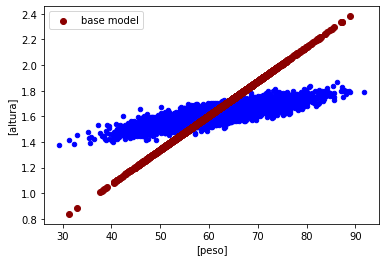

In [44]:
fig = plt.figure()
ax = fig.add_subplot()
df_femenino.plot.scatter(['peso'], ['altura'], color='b', ax=ax)
ax.scatter(X_test, y_hat_base, color='darkRed', label="base model")
ax.legend()
plt.show()

In [45]:
from sklearn import linear_model
# Calcular y visualizar le prediccion de peso vs altura
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [46]:
from sklearn.metrics import r2_score
# En este caso, ya que se trata de una regresión lineal puedo relacinonar el
# índice R2 con el coeficiente de correlación lineal.
value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.73


In [47]:
value = r2_score(y_test, y_hat_base)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: -6.09


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

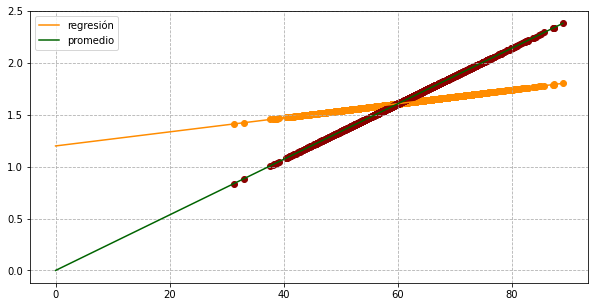

No handles with labels found to put in legend.


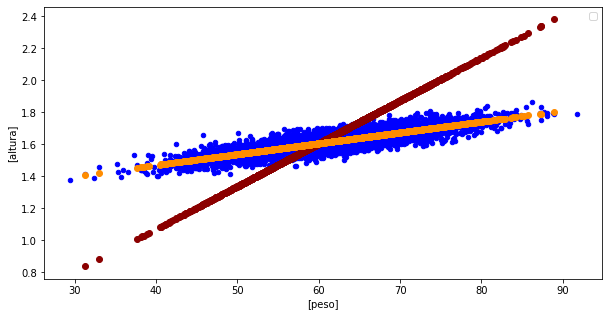

In [48]:
m1 = lr.coef_
b1 = lr.intercept_
lx1 = np.array([0, X_test.max()])
ly1 = lx1 * m1 + b1

m2 = promedio
b2 = 0
lx2 = np.array([0, X_test.max()])
ly2 = lx2 * m2 + b2

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.scatter(X_test, y_hat, color='darkOrange')
ax.plot(lx1, ly1, color='darkOrange', label='regresión')
ax.scatter(X_test, y_hat_base, color='darkRed')
ax.plot(lx2, ly2, color='darkGreen', label='promedio')
ax.grid(ls='dashed')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
df_femenino.plot.scatter(['peso'], ['altura'], color='b', ax=ax)
ax.scatter(X_test, y_hat_base, color='darkRed')
ax.scatter(X_test, y_hat, color='darkOrange')
ax.legend()
plt.show()

In [ ]:
Con esto concluye que el mejor resultado que se obtuvo fue un ajuste del 73% utilizando una regresión lineal simple.